## Problem Statement and data collection

In [214]:
import pandas as pd 

bnb_df = pd.read_csv("AB_NYC_2019.csv")
bnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploration and data cleaning

There are 48895 rows and 16 columns <br>
The amount of non null values are generally the same with some variation in last_review and reviews_per_month showing more nulls

In [215]:
#obtain dimensions
bnb_df.shape

(48895, 16)

In [216]:
#data types and non nulls
bnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [217]:
#eliminate duplicates
new_df = bnb_df.drop(columns='id').drop_duplicates()
#print(bnb_df.duplicated().sum())
new_df.head()


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [218]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [219]:
#clean_df = new_df.drop(columns=['host_id', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'], axis=1,inplace=True)
#price_df = clean_df.drop(columns=[''], axis=1,inplace=True)
display(new_df)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


Note: you may need to restart the kernel to use updated packages.


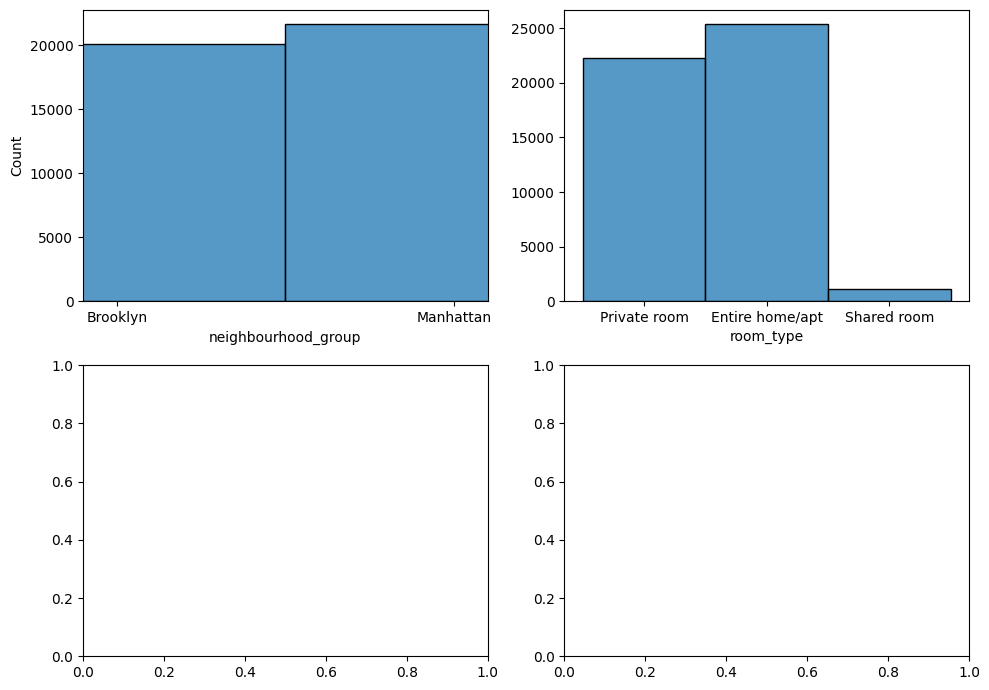

In [220]:
import matplotlib.pyplot as plt 
%pip install seaborn
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = new_df, x = "neighbourhood_group").set_xlim(-0.1, 1.1)
#sns.histplot(ax = axis[0, 1], data = new_df, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = new_df, x = "room_type").set(ylabel = None)
#sns.histplot(ax = axis[1, 0], data = new_df, x = "Embarked")
#sns.histplot(ax = axis[1, 1], data = new_df, x = "SibSp").set(ylabel = None)
#sns.histplot(ax = axis[1, 2], data = new_df, x = "Parch").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

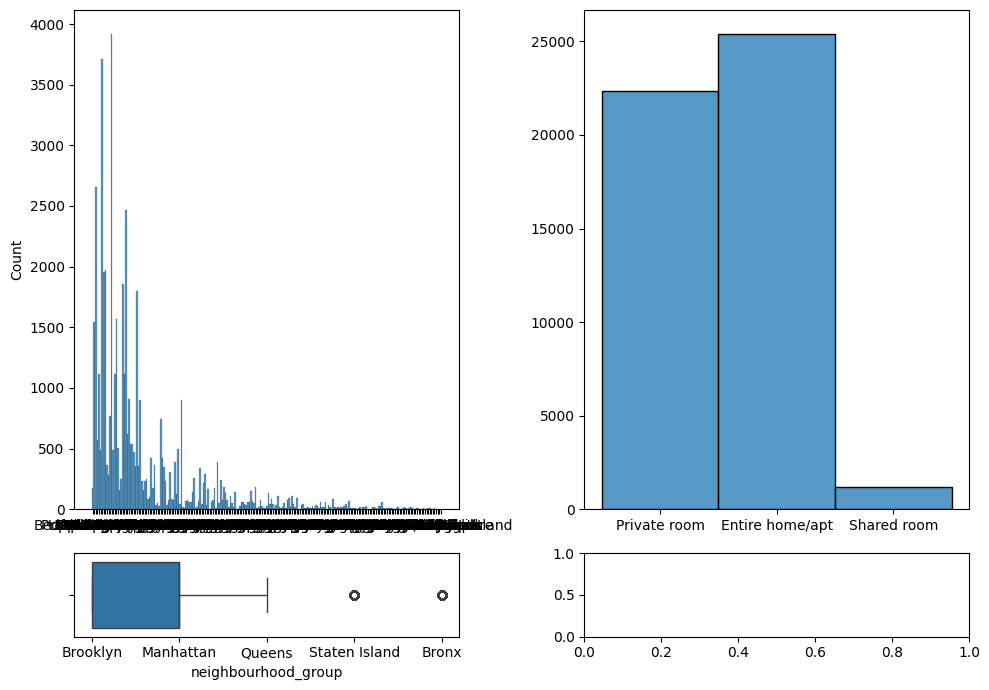

In [221]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = new_df, x = "neighbourhood").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = new_df, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 1], data = new_df, x = "room_type").set(xlabel = None, ylabel = None)
#sns.boxplot(ax = axis[1, 1], data = new_df, x = "Age")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

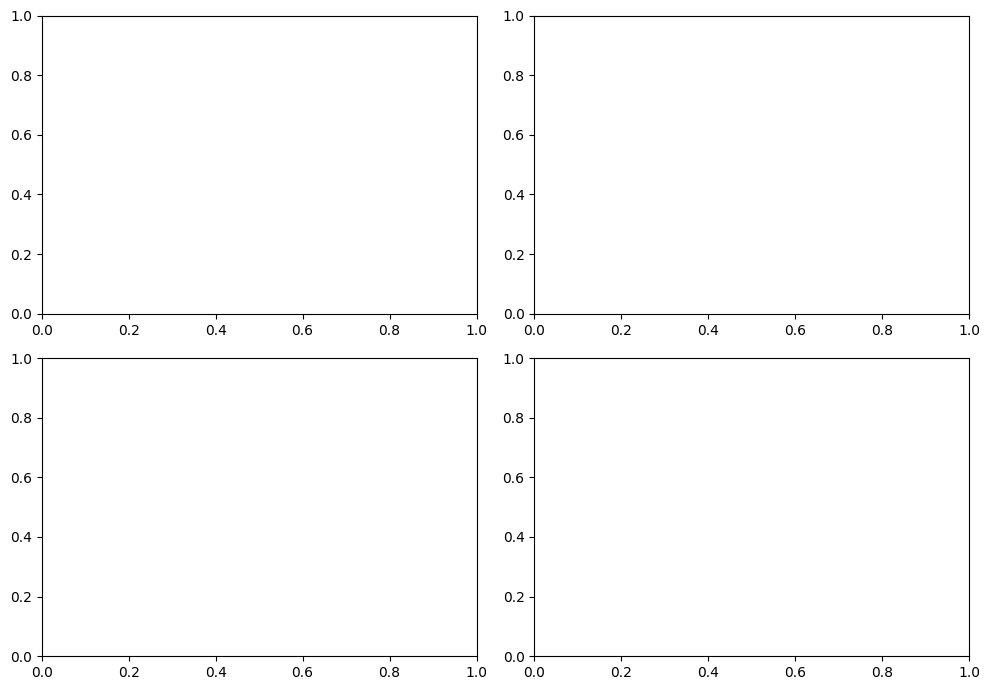

In [222]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
#sns.regplot(ax = axis[0, 0], data = new_df, x = "Fare", y = "Survived")
#sns.heatmap(new_df[["price", "room_type"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
#sns.regplot(ax = axis[0, 1], data = total_data, x = "Age", y = "Survived").set(ylabel=None)
#sns.heatmap(new_df[["Survived", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Day 2

In [223]:
#Oultier Analysis
new_df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


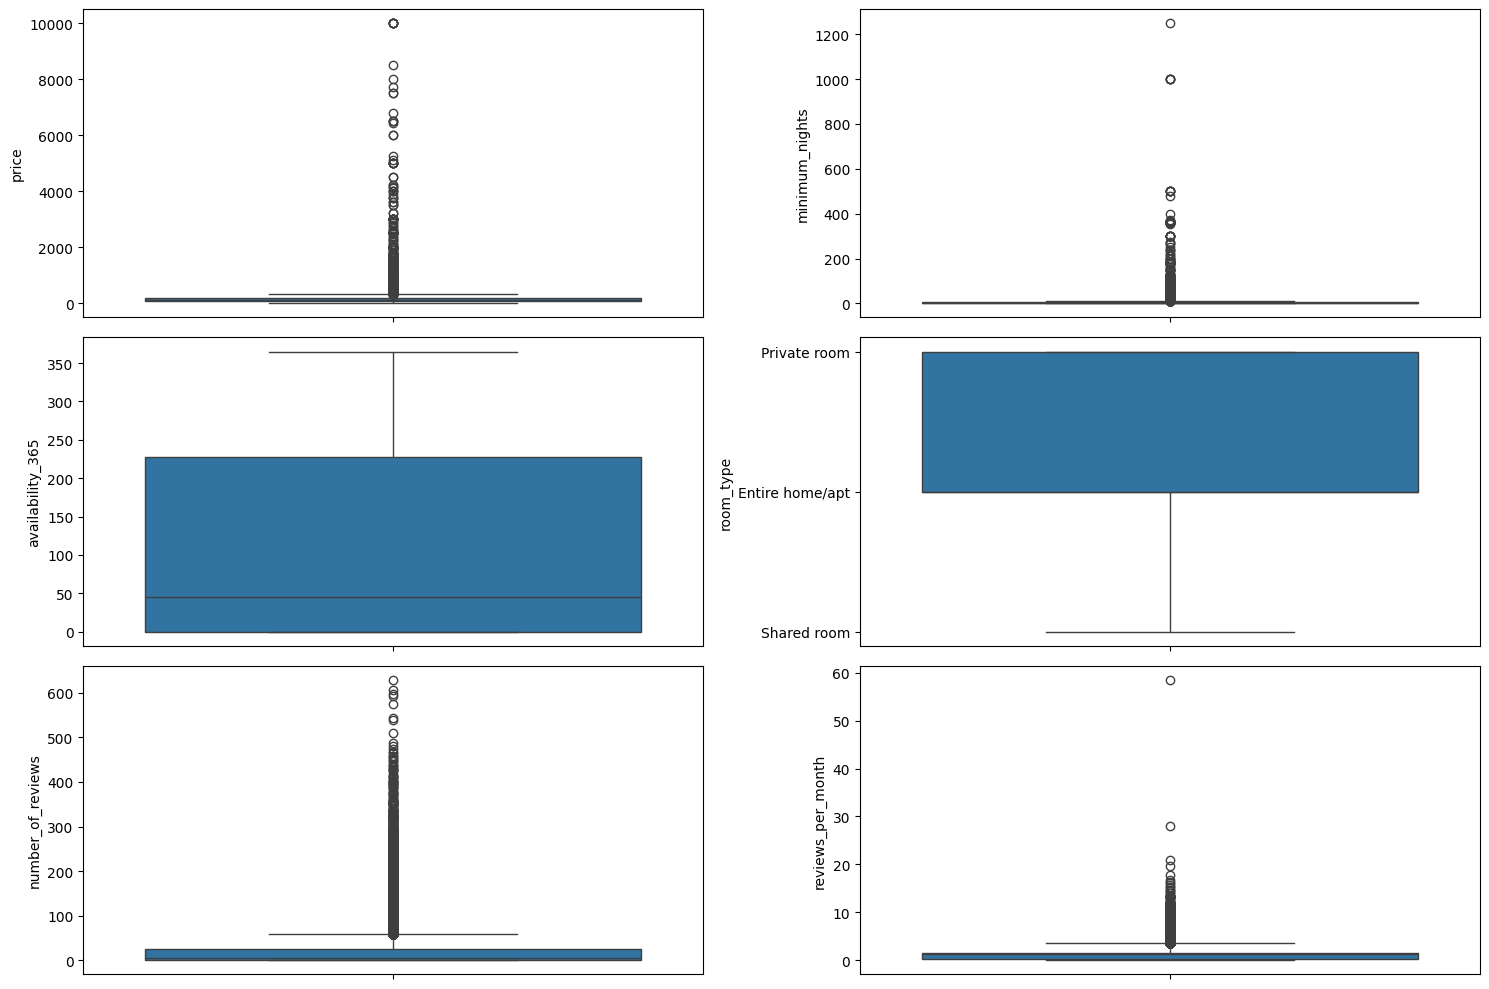

In [231]:
fig, axis = plt.subplots(3, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = new_df, y = "price")
sns.boxplot(ax = axis[0, 1], data = new_df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = new_df, y = "room_type")
sns.boxplot(ax = axis[1, 0], data = new_df, y = "availability_365")
sns.boxplot(ax = axis[2, 0], data = new_df, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 1], data = new_df, y = "reviews_per_month")


plt.tight_layout()

plt.show()

In [225]:
 #fare stats 
 room_price_stats = new_df['price'].describe()
 print(room_price_stats)

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [226]:
#iqr for price
price_iqr = room_price_stats['75%'] - room_price_stats['25%']
upper_limit = room_price_stats['75%'] + 1.5 * price_iqr
lower_limit = room_price_stats['25%'] - 1.5 * price_iqr

print(f'The upper limit is: {upper_limit} and the lower limit is {lower_limit} and iqr is {price_iqr}')

outlier_price = new_df[new_df['price'] > 334]
outlier_price.head()


The upper limit is: 334.0 and the lower limit is -90.0 and iqr is 106.0


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216


### Handle Null Values

In [227]:
#missing data 
null_values = new_df.isnull().sum().sort_values(ascending=False)

total_null_values = null_values/len(new_df)
print(total_null_values)

reviews_per_month                 0.205583
last_review                       0.205583
host_name                         0.000429
name                              0.000327
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
longitude                         0.000000
latitude                          0.000000
room_type                         0.000000
price                             0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64


In [228]:

# Fill NA with host names and count nulls
# drop name, host_name 
#new_df.drop(columns= ['name', 'host_name', 'last_review', 'calculated_host_listings_count'], inplace=True)

new_df['reviews_per_month'].fillna(new_df['reviews_per_month'].mean(), inplace=True)


print(new_df['reviews_per_month'].isnull().sum())


# new_df.isnull().sum()

0


C:\Users\624796\AppData\Local\Temp\ipykernel_32476\3071437792.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['reviews_per_month'].fillna(new_df['reviews_per_month'].mean(), inplace=True)


### One Hot Encode Dimensions

In [232]:
from sklearn.preprocessing import OneHotEncoder

#Convert all categorical values to 1 0 
encoder = OneHotEncoder()
encoder = OneHotEncoder(sparse_output=True)

columns_to_encode = ['neighbourhood_group', 'neighbourhood', 'room_type']


#print(new_df.columns)
new_df_encoded = encoder.fit_transform(new_df[columns_to_encode])

#get column names 
encoded_columns = encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(new_df_encoded.toarray(), columns=encoded_columns)

#new_df = new_df.drop(columns=columns_to_encode)
final_df = pd.concat([new_df, encoded_df], axis= 1)

#final_df = final_df.drop(columns=['calculated_host_listings_count','last_review'])
final_df.head()
#convert to dataframe
#encoded_df = pd.DataFrame(new_df_encoded, columns=encoder.get_feature_names_out(new_df.columns))




,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Train Test Split

In [240]:
from sklearn.model_selection import train_test_split

feature_variables = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

x = final_df[feature_variables]
y = final_df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

       minimum_nights  number_of_reviews  reviews_per_month  availability_365
32645               3                 11           0.870000                 1
23615               2                  2           0.160000                 0
31183               2                  0           1.373221                 0
29260               3                 87           4.910000               267
7275                5                 13           0.250000                 0
32645    295
23615     70
31183     58
29260     75
7275      38
Name: price, dtype: int64


### Feature Scaling

In [241]:
from sklearn.preprocessing import StandardScaler

#identify columns and scale numerical values
columns_to_scale = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

#scalar with featured columns to scale
scaler = StandardScaler()
final_df[columns_to_scale] = scaler.fit_transform(final_df[columns_to_scale])

print(final_df.head())

                                               name  host_id    host_name  \
0                Clean & quiet apt home by the park     2787         John   
1                             Skylit Midtown Castle     2845     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth   
3                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park     7192        Laura   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  ...  neighbourhood_Williamsburg  \
0    149     

### Min Max Scaling

In [213]:
#min max scaling 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=feature_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=feature_variables)

X_train_norm.head()



,minimum_nights,number_of_reviews,reviews_per_month,availability_365
32645,0.001601,0.017488,0.014703,0.002740
23615,0.000801,0.003180,0.002565,0.000000
31183,0.000801,0.000000,0.023307,0.000000
29260,0.001601,0.138315,0.083775,0.731507
7275,0.003203,0.020668,0.004103,0.000000


### Create CSV

In [234]:
#train and test df
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_df.to_csv('train_set.csv', index=False)
test_df.to_csv('test_set.csv', index=False)

In [243]:
print(test_df.columns)
print(train_df.columns)

AttributeError: 'Series' object has no attribute 'columns'